> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a TMDb movie data Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains information about 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue.
<ul>
<li>
Certain columns, like ‘cast’and ‘genres’, contain multiplevalues separated by pipe (|)characters.</li>
<li>There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You canleave them as is.</li>
<li>The final two columns endingwith “_adj” show the budget andrevenue of the associated moviein terms of 2010 dollars,accounting for inflation overtime.</li>
    
Questions:
1. Find the profit for each movie.
2. Which movies have the most and least profit?
3. Which movies have the most and least Budget, Revenue and Runtime? 
4. Average runtime of the movies
5. What are the top genres?
6. Which year has the highest release of movies

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

#### Import TMDb Movie dataset and Print first 5 rows

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv'
df = pd.read_csv(url)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


#### Observation:
The dataset includes lots of movies that have a value of '0' for the budget or revenue.

#### Printing rows and columns of dataset

In [4]:
df.shape

(10866, 21)

#### Printing columns

In [5]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

#### Checking if columns consist of any null values or not.

In [6]:
#Count total rows in each column which contain null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Data Cleaning 
First let's check the duplicates in our dataset.

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#After dropping the duplicate rows from the dataset
df.shape

(10865, 21)

Now modifying the release date format into datetime format

In [11]:
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

Now I decide to drop columns that is not necessarily needed in our investigation.
Columns to be dropped:{
                        'budget_adj',
                        'revenue_adj',
                        'overview',
                        'imdb_id',
                        'homepage','tagline'}

In [12]:
df.drop(['imdb_id','homepage','tagline','budget_adj','revenue_adj','overview'], axis=1, inplace=True)
#After dropping columns from the dataset
df.shape

(10865, 15)

As you can see in this movie dataset there are lots of movies where the budget or revenue has a value of '0' which means the values of those movies' variables were not registered. Calculating those films' earnings would result in unacceptable results. I think this could be due to factors that differ, such as the lack of details, or the films that have never been released.So lets delete them.

In [13]:
#Finding the no. of rows in budget and revenue columns with zero values.
print("No. of rows with 0 values in budget:",df[df['budget']==0].shape[0])
print('No. of rows with 0 values in revenue:',df[df['revenue']==0].shape[0])

No. of rows with 0 values in budget: 5696
No. of rows with 0 values in revenue: 6016


In [14]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that posed here

### Research Question 1. Find the profit for each movie.

In [15]:
df.insert(4,'profit_earned', df['revenue']-df['budget'])
df.head()

,id,popularity,budget,revenue,profit_earned,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,1363528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,228436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,185238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,1868178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,1316249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


### Research Question 2. Which movies have the most and least profit?

In [16]:

#define a function to calculate te most and least profit movies.
def calculate(col_name):
    #highest earned profit movie
    highest_movie = df[col_name].idxmax()
    highest_df = pd.DataFrame(df.loc[highest_movie])
    
    #lowest earned profit movie
    lowest_movie = df[col_name].idxmin()
    lowest_df = pd.DataFrame(df.loc[lowest_movie])
    
    #result
    result = pd.concat([highest_df, lowest_df], axis = 1)
    
    return result

#calling the function
calculate('profit_earned')

,1386,2244
id,19995,46528
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit_earned,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
keywords,culture clash|future|space war|space colony|so...,assassin|small town|revenge|deception|super speed
runtime,162,100


#### After seeing above result movie 'Avatar' earns the most profit and the movie 'The Warrior's Way' earns the least profit in our dataset.

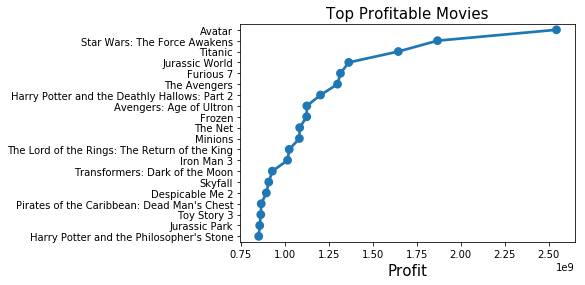

In [17]:
info = pd.DataFrame(df['profit_earned'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:20])
y = list(info['profit_earned'][:20])

ax = sns.pointplot(x=y,y=x)
#setup the figure size
sns.set(rc={'figure.figsize':(12,8)})
#setup the title and labels of the plot.
ax.set_title("Top Profitable Movies",fontsize = 15)
ax.set_xlabel("Profit",fontsize = 15)
sns.set_style("white")

### Research Question 3. Which movies have the most and least Budget, Revenue and Runtime?

In [18]:
df['budget'] = df['budget'].replace(0,np.NAN)
calculate('budget')

,2244,1151
id,46528,287524
popularity,0.25054,0.177102
budget,4.25e+08,1
revenue,11087569,0
profit_earned,-413912431,-1
original_title,The Warrior's Way,Fear Clinic
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Thomas Dekker|Robert Englund|Cleopatra Coleman...
director,Sngmoo Lee,Robert Hall
keywords,assassin|small town|revenge|deception|super speed,phobia|doctor|fear
runtime,100,95


##### Observations:

The Warrior's Way :Hight Budget Movie 

Fear Clinic :Low Budget Movie

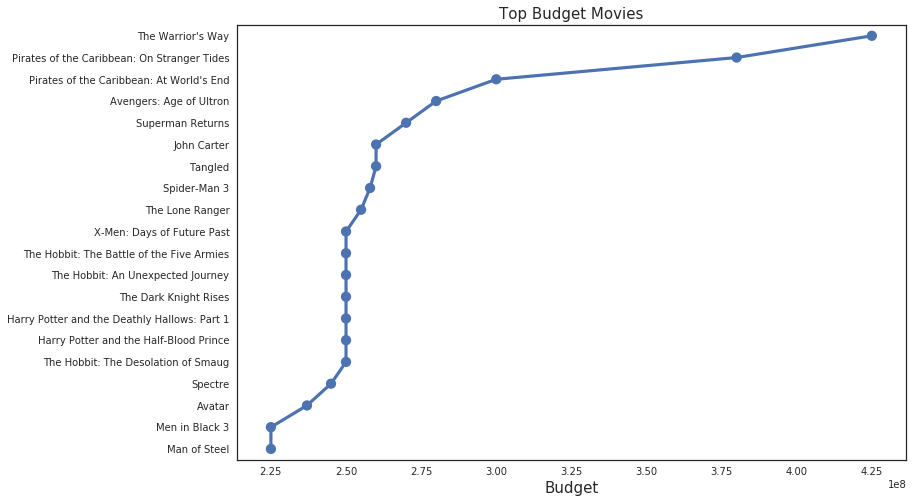

In [19]:
info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:20])
y = list(info['budget'][:20])

ax = sns.pointplot(x=y,y=x)
#setup the figure size
sns.set(rc={'figure.figsize':(12,8)})
#setup the title and labels of the plot.
ax.set_title("Top Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 15)
sns.set_style("white")

In [20]:
df['revenue'] = df['revenue'].replace(0,np.NAN)
calculate('revenue')

,1386,5067
id,19995,13537
popularity,9.43277,0.462609
budget,2.37e+08,6e+06
revenue,2.78151e+09,2
profit_earned,2544505847,-5999998
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
director,James Cameron,Billy Ray
keywords,culture clash|future|space war|space colony|so...,NaN
runtime,162,94


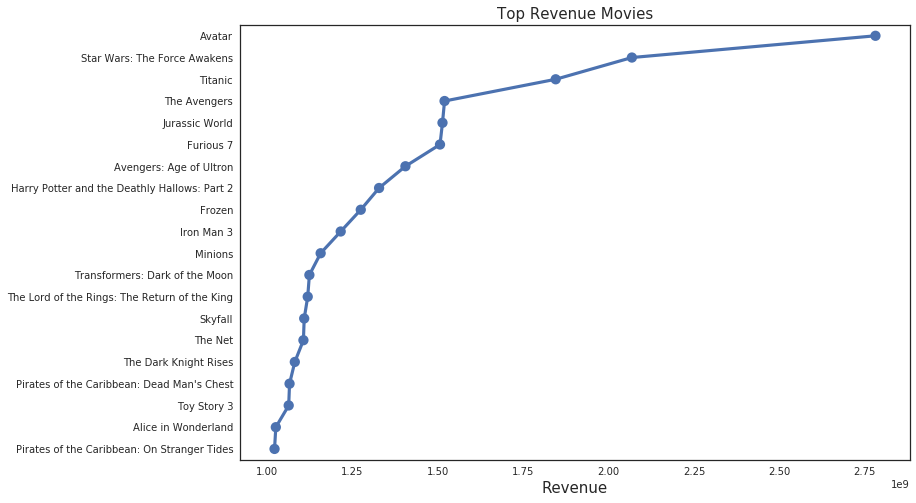

In [21]:
info = pd.DataFrame(df['revenue'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:20])
y = list(info['revenue'][:20])

ax = sns.pointplot(x=y,y=x)
#setup the figure size
sns.set(rc={'figure.figsize':(12,8)})
#setup the title and labels of the plot.
ax.set_title("Top Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 15)
sns.set_style("white")

In [22]:
df['runtime'] = df['runtime'].replace(0,np.NAN)
calculate('runtime')

,3894,4883
id,125336,142563
popularity,0.006925,0.078472
budget,NaN,NaN
revenue,NaN,NaN
profit_earned,0,0
original_title,The Story of Film: An Odyssey,Fresh Guacamole
cast,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,NaN
director,Mark Cousins,PES
keywords,cinema|nouvelle vague|hindi cinema|cinema novo...,NaN
runtime,900,2


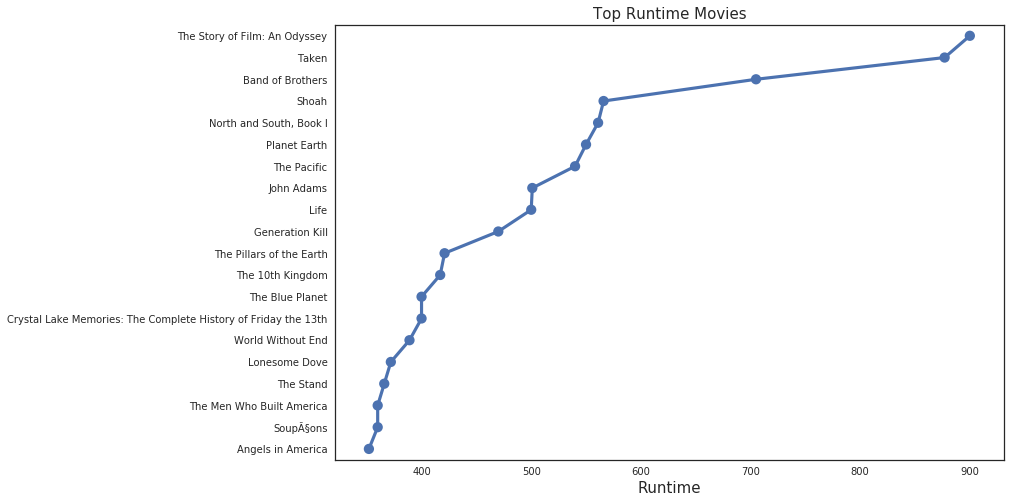

In [23]:
info = pd.DataFrame(df['runtime'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:20])
y = list(info['runtime'][:20])

ax = sns.pointplot(x=y,y=x)
#setup the figure size
sns.set(rc={'figure.figsize':(12,8)})
#setup the title and labels of the plot.
ax.set_title("Top Runtime Movies",fontsize = 15)
ax.set_xlabel("Runtime",fontsize = 15)
sns.set_style("white")

### Research Question 4. Average runtime of the movies

In [25]:
def avg_run(column):
    return df[column].mean()

print("Average runtime of Movies:",avg_run('runtime'))

Average runtime of Movies: 102.363854532


### Research Question 5. What are the top genres?

In [27]:
df.loc[:,['original_title',  'genres']].head()

,original_title,genres
0,Jurassic World,Action|Adventure|Science Fiction|Thriller
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller
2,Insurgent,Adventure|Science Fiction|Thriller
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy
4,Furious 7,Action|Crime|Thriller


In [28]:
def extract_data(col_name):
    # From the column entered, eparate the string by '|'
    # Store the values separately as series
    all_data = df[col_name].str.cat(sep = '|')
    all_data = pd.Series(all_data.split('|'))
    count = all_data.value_counts(ascending = False)
    return count

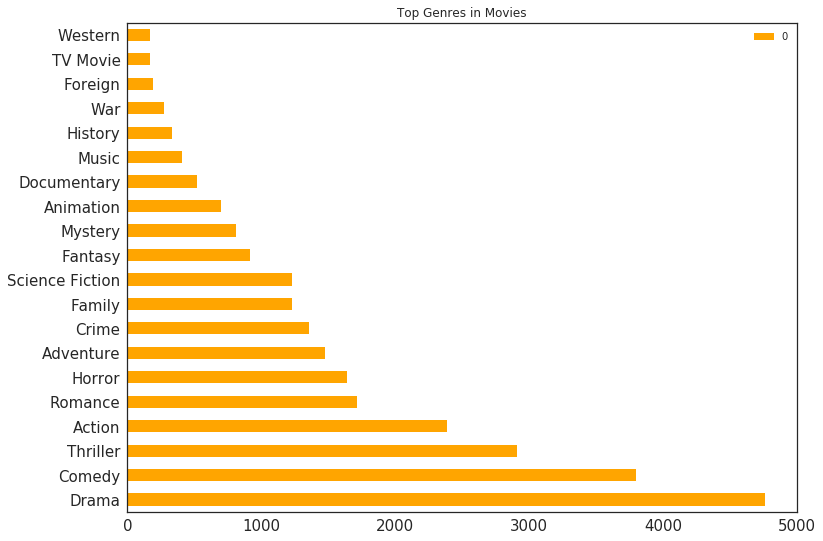

In [29]:
#function for the genres and plot.
genres_count = extract_data('genres')
genres_count = pd.DataFrame(data=genres_count)
top_genres = genres_count.head(10)
#top_genres

#ploting
lt = genres_count.plot.barh(color = 'orange', fontsize = 15)
#title
lt.set(title = 'Top Genres in Movies')
# on x axis
#figure size(width, height)
lt.figure.set_size_inches(12, 9)
#ploting the graph
plt.show()

Drama genre has the highest release of films followed by Comedy and Thriller according to the plot.

### Research Question 6. Which year has the highest release of movies

release_year
2011    540
2012    588
2013    659
2014    700
2015    629
Name: id, dtype: int64


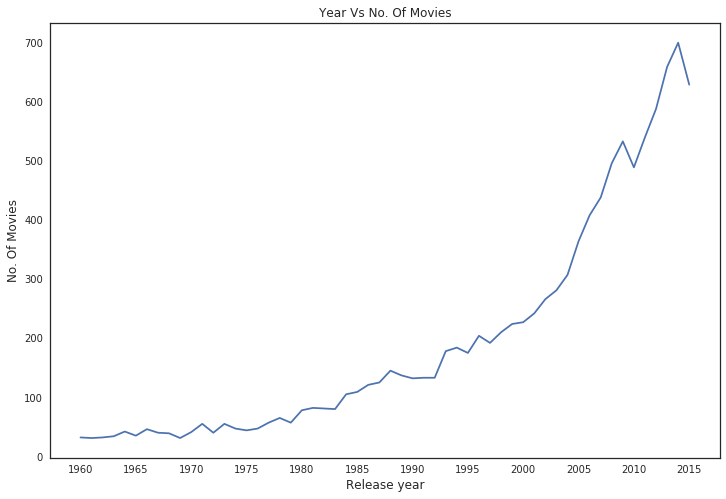

In [30]:
import seaborn as sns
# make group for each year and count the number of movies in each year 
data=df.groupby('release_year').count()['id']
print(data.tail())

#make group of the data according to their release year and count the total number of movies in each year and pot.
df.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

#set the figure size and labels
sns.set(rc={'figure.figsize':(12,7)})
plt.title("Year Vs No. Of Movies",fontsize = 12)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('No. Of Movies',fontsize = 12)
#set the style sheet
sns.set_style("white")

<a id='conclusions'></a>
## Conclusions
Movies with higher budgets have shown a corresponding increase in the revenues.

'Avatar', 'Star Wars' and 'Titanic' are the most profitable movies.

Profits: profits has positive relationship with budget and popularity

Runtime: Average of 102 minutes from all movies

Short or Long duration movies are more popular than long duration movies.

Average runtime of the movies are decreasing year by year.

Drama is the most popular genre, following by comedy and thriller.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0